In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [12]:
base = "data/"

def get_data():
    data = {}
    for filename in sorted(os.listdir(base)):
        filepath = base + filename
        filename_without_ext = filename.split('.')[0]
        with open(filepath) as f:
            data[filename_without_ext] = np.loadtxt(filepath, delimiter=',')
    return data


In [13]:
get_data()['12mM'][0]


array([625.063, 150.264, 254.863,  81.825,  99.033, 209.444,  37.87 ,
        44.203,  30.646,   9.583,  34.616,  26.84 , 171.372,  54.477,
        18.785,  15.591,  34.316,  69.317,  24.333])

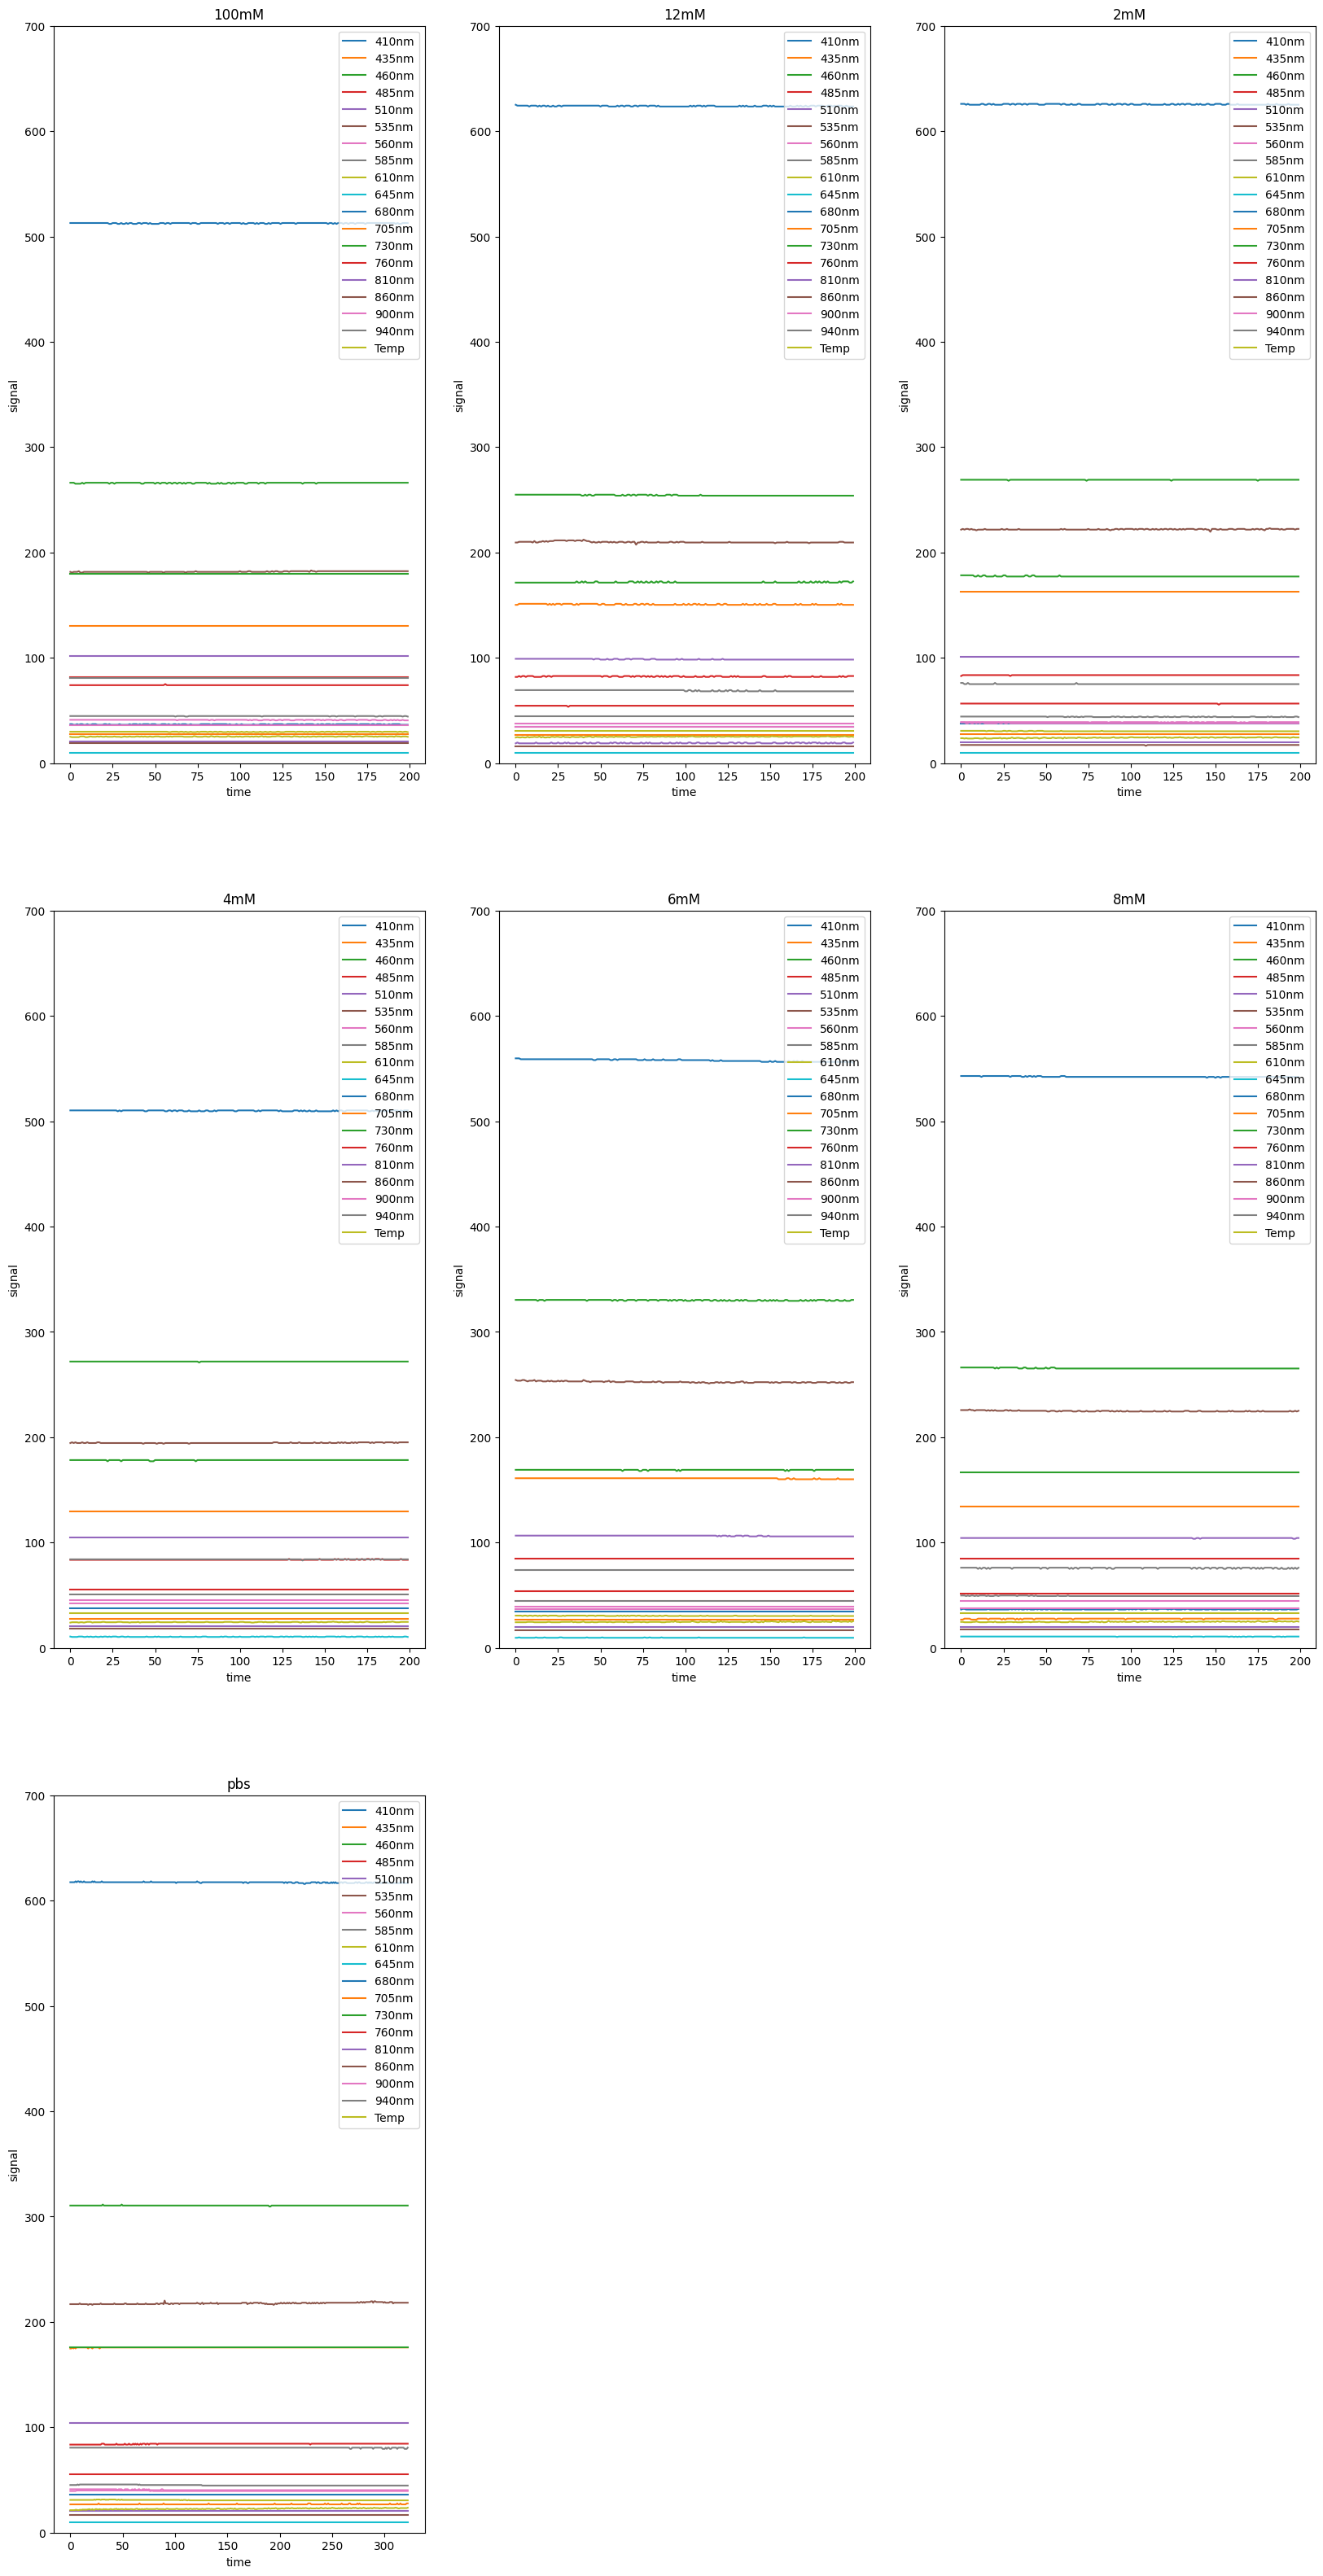

In [17]:
data = get_data()
plt.figure(figsize=(20, 40))
for i, (k, v) in enumerate(data.items()):
    plt.subplot(3, 3, i+1)
    plt.plot(v)
    plt.title(k)
    plt.xlabel('time')
    plt.ylabel('signal')
    plt.ylim(0, 700)
    plt.legend(["410nm","435nm","460nm","485nm","510nm","535nm","560nm","585nm","610nm","645nm","680nm","705nm","730nm","760nm","810nm","860nm","900nm","940nm", "Temp"])
plt.show()


In [26]:
from sklearn.model_selection import train_test_split

data = get_data()
files = ["pbs", "2mM", "4mM", "6mM", "8mM", "12mM"]

features_count = data["pbs"].shape[1]

trainData, trainLabels = np.zeros(shape=(0, features_count)), np.zeros(shape=(0, 1))
testData, testLabels = np.zeros(shape=(0, features_count)), np.zeros(shape=(0, 1))

for file in files:
    file_data = data[file][:200, :]
    label = 0 if file == "pbs" else int(file.replace("mM", ""))
    
    trainX, testX = train_test_split(file_data, test_size=0.1, random_state=42, shuffle=True)
    trainY, testY = np.full((trainX.shape[0], 1), label), np.full((testX.shape[0], 1), label)
    
    trainData = np.concatenate((trainData, trainX), axis=0)
    trainLabels = np.concatenate((trainLabels, trainY), axis=0)
    testData = np.concatenate((testData, testX), axis=0)
    testLabels = np.concatenate((testLabels, testY), axis=0)

print(trainData.shape, trainLabels.shape, testData.shape, testLabels.shape)


(1080, 13) (1080, 1) (120, 13) (120, 1)


In [27]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression().fit(trainData, trainLabels)


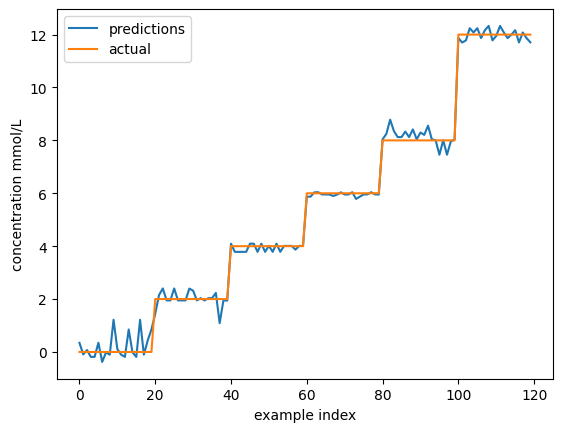

In [36]:
preds = linReg.predict(testData)

plt.plot(preds, label="predictions")
plt.plot(testLabels, label="actual")
plt.legend()
plt.xlabel("example index")
plt.ylabel("concentration mmol/L")
plt.show()


In [19]:
linReg.coef_


array([[-0.01110328, -0.20382756, -0.03133219, -0.09438497,  0.09761441,
         0.02142183, -0.35325229,  0.07374147,  0.12577099, -0.13117248,
        -0.28318314, -0.04470962, -0.01869954,  0.03062625, -0.0514597 ,
        -2.86455568, -0.22426358, -0.08482169, -0.03607555]])

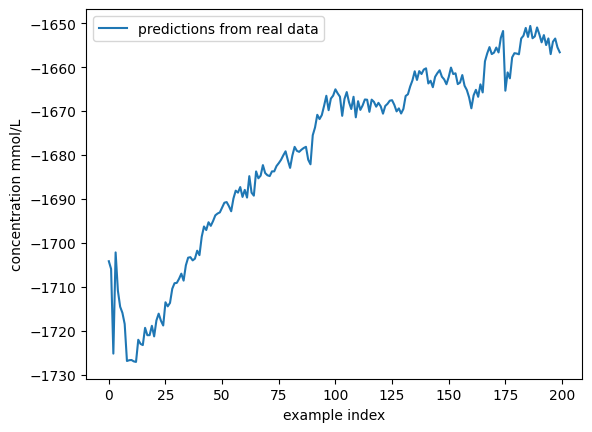

In [37]:
# Real data

exp_data = np.loadtxt("../experiment1/data_controlled_temp/fasted/0.csv", skiprows=1, delimiter=',')[:, 6:]
exp_preds = linReg.predict(exp_data)

plt.plot(exp_preds, label="predictions from real data")
plt.xlabel("example index")
plt.ylabel("concentration mmol/L")
plt.legend()
plt.show()
